# **Case study: How does a bike-share navigate speedy success?** 

# <u>Introduction</u><br>
👋🏼 Hello, as part of my completion of the **Google Data Analytics Certificate** program 🗞, here is my capstone project! In this case study, **I** work for a fictional bike-share company, *Cyclistic*, along with some key team members. As this is my first project and public notebook I am looking forward to your feedback and constructive criticism to develop my skills and become a better data analyst. 🎉

# <u>Scenario</u><br>
I am a junior data analyst working on the marketing analyst team at *Cyclistic*, a bike-share company in Chicago. The director of marketing and my manager **Lily Moreno** believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use *Cyclistic* bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# <u>Ask</u><br>

#### There 3 questions that will guide the future marketing program:
1. How do annual members and casual riders use *Cyclistic* bikes differently?
2. Why would casual riders buy *Cyclistic* annual memberships?
3. How can *Cyclistic* use digital media to influence casual riders to become members?

#### My manager has assigned me the first question to answer: How do annual members and casual riders use *Cyclistic* bikes differently?

- By understanding how annual members and casual riders use *Cyclistic* bikes differently, we can identify trends and target casual riders to convert them to be annual members.

# <u>Prepare</u><br>

For this project I will be using the public dataset from [divvybikes.com](http://divvybikes.com) website under [System Data](https://divvybikes.com/system-data) at the bottom of the webpage. The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement). The data is organized by year from 2013 to February 2025. It is in zip folders, which can then be opened into a .csv file. I downloaded and used the first quarters for the year [2019](https://docs.google.com/spreadsheets/d/1uCTsHlZLm4L7-ueaSLwDg0ut3BP_V4mKDo2IMpaXrk4/template/preview?resourcekey=0-dQAUjAu2UUCsLEQQt20PDA#gid=1797029090) & [2020](https://docs.google.com/spreadsheets/d/179QVLO_yu5BJEKFVZShsKag74ZaUYIF6FevLYzs3hRc/template/preview#gid=640449855). There are no issues of bias as the data shares no personal information (i.e. names, race, sexuality) and the data is maintained up-to-date “AS IS” frequently.

# <u>Process</u><br>

The tools I am choosing for this project are **Google Sheets**, **R**, and **Tableau**. With these three tools I am able to collect, export, and import data. I can also clean, format, organize, and analyze the data. Finally, I am able to visualize the data and provide insight to the stakeholders.

1. Unzip the files

    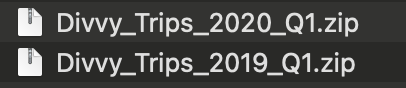

2. I created subfolders for the .csv file and the .xlsx file so that I have a copy  of the original data. I moved the downloaded files to the appropriate subfolder.

   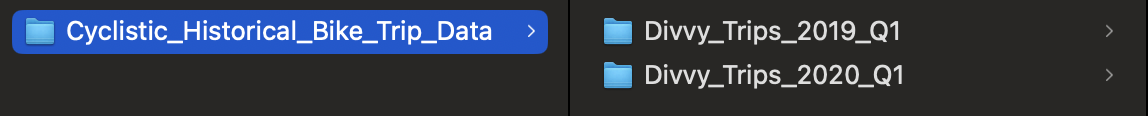

   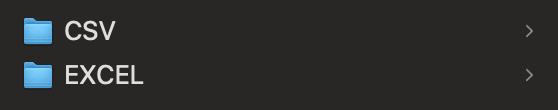

3. I opened the spreadsheets and created a column called **ride_length**. I then calculate the length of each ride by subtracting the column **started_at** from the  column **ended_at** and format as *HH:MM:SS* using Format > Number > Duration.

   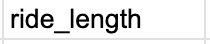

   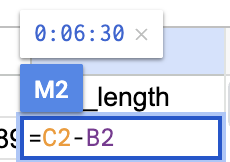

   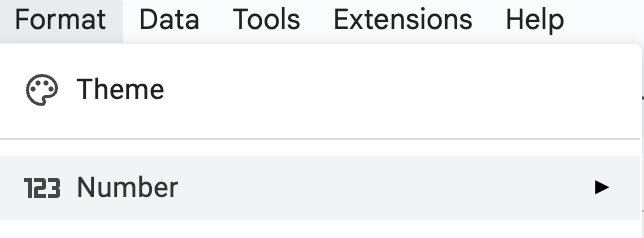

   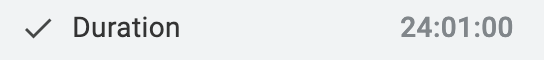

4. I then created a column called **day_of_week**, and calculated the day of the week that each ride started using the WEEKDAY command in each file. Format as General or as a number with no decimals, noting that 1 = Sunday and 7 = Saturday.

   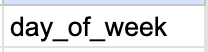

   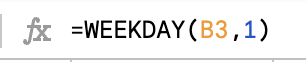

# <u>Analyze</u><br>

I then opened **RStudio** for further analysis of the dataset. The following will include R code I used for my analysis process.

* Loading the *tidyverse* package because it helps wrangle data

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


* Using the *conflicted* package to manage conflicts

In [2]:
library(conflicted)

* Set dplyr::filter and dplyr::lag as the default choices

In [3]:
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

[conflicted] Will prefer dplyr::filter over any other package.


[conflicted] Will prefer dplyr::lag over any other package.


* The *readr* package provides a fast and friendly way to read rectangular data (like 'csv', 'tsv', and 'fwf')

In [4]:
library(readr)

* Now is the time to collect and upload the datasets (csv files) here

In [5]:
q1_2019 <- read_csv("/kaggle/input/divvy-trips-q1/Divvy_Trips_2019_Q1.csv")
q1_2020 <- read_csv("/kaggle/input/divvy-trips-q1/Divvy_Trips_2020_Q1.csv")

Rows: 365069 Columns: 12


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 426887 Columns: 13


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


* I compared column names each of the files

* While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file

In [6]:
colnames(q1_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

* I renamed columns to make them consistent with q1_2020 (as this will be the supposed going-forward table design for Divvy)

In [7]:
(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,1727,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


* The I inspected the dataframes and looked for incongruencies

In [8]:
str(q1_2019)
str(q1_2020)

spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : POSIXct[1:365069], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:365069], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:365069] "Subscriber" "Subscriber" "

spc_tbl_ [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ star

* I converted **ride_id** and **rideable_type** to *character* so that they can stack correctly

In [9]:
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type))

* I combined the two individual quarter's data frames into one big data frame

In [10]:
all_trips <- bind_rows(q1_2019, q1_2020)

* I removed **lat**, **long**, **birthyear**, and **gender** fields as this data was dropped beginning in 2020

In [11]:
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

* Now to inspect the new table that has been created

In [12]:
colnames(all_trips)  #List of column names
nrow(all_trips)  #Number of rows in the data frame
dim(all_trips)  #Dimensions of the data frame
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 791956

[1] 791956      9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


tibble [791,956 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791956], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:791956], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


   ride_id            started_at                    
 Length:791956      Min.   :2019-01-01 00:04:37.00  
 Class :character   1st Qu.:2019-02-28 17:04:04.75  
 Mode  :character   Median :2020-01-07 12:48:50.50  
                    Mean   :2019-09-01 11:58:08.35  
                    3rd Qu.:2020-02-19 19:31:54.75  
                    Max.   :2020-03-31 23:51:34.00  
                                                    
    ended_at                      rideable_type      start_station_id
 Min.   :2019-01-01 00:11:07.00   Length:791956      Min.   :  2.0   
 1st Qu.:2019-02-28 17:15:58.75   Class :character   1st Qu.: 77.0   
 Median :2020-01-07 13:02:50.00   Mode  :character   Median :174.0   
 Mean   :2019-09-01 12:17:52.17                      Mean   :204.4   
 3rd Qu.:2020-02-19 19:51:54.50                      3rd Qu.:291.0   
 Max.   :2020-05-19 20:10:34.00                      Max.   :675.0   
                                                                     
 start_station_n

* There are a few problems we will need to fix:
    (1) In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.
    (2) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data such as day, month, year, that provide additional opportunities to aggregate the data.
    (3) We will want to add a calculated field for length of ride since the 2020 Q1 data did not have the "tripduration" column. We will add "**ride_length**" to the entire dataframe for consistency.
    (4) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

* In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
* Before 2020, Divvy used different labels for these two types of riders. I would want to make my dataframe consistent with their current nomenclature
* I begin by seeing how many observations fall under each usertype

In [13]:
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480      23163     378407     341906 

* I then reassign the desired values (we will go with the current 2020 labels)

In [14]:
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

* I check to make sure the proper number of observations were reassigned

In [15]:
table(all_trips$member_casual)


casual member 
 71643 720313 

* I add columns that list the date, month, day, and year of each ride
* This will allow me to aggregate ride data for each month, day, or year ... before completing these operations I could only aggregate at the ride level

In [16]:
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

* I then added a "**ride_length**" calculation to all_trips (in seconds)

In [17]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

* Now I snspect the structure of the columns

In [18]:
str(all_trips)

tibble [791,956 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791956], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:791956], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ date              : Date[1:791956], format: "2019-01-01" "2

* I then convert "**ride_length**" from *Factor* to *Numeric* so I can run calculations on the data

In [19]:
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

* I then remove "bad" data
* The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
* I then create a new version of the dataframe (v2) since data is being removed

In [20]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

* Now is time for descriptive analysis on ride_length (all figures in seconds)

In [21]:
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride

[1] 1189.459

[1] 539

[1] 10632022

[1] 1

* You can condense the four lines above to one line using summary() on the specific attribute

In [22]:
summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      331      539     1189      912 10632022 

* I compare members and casual users

In [23]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5372.7839
member,795.2523


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1393
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


* I can see the average ride time by each day for members vs casual users

In [24]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


 * I notice that the days of the week are out of order. Let's fix that.

In [25]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

*  Now, let's run the average ride time by each day for members vs casual users

In [26]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,4752.0504
member,Monday,822.3112
casual,Tuesday,4561.8039
member,Tuesday,769.4416
casual,Wednesday,4480.3724
member,Wednesday,711.9838
casual,Thursday,8451.6669


* I then analyze ridership data by type and weekday

In [27]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()		#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 	# calculates the average duration
  arrange(member_casual, weekday)	# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5061.3044
casual,Mon,5591,4752.0504
casual,Tue,7311,4561.8039
casual,Wed,7690,4480.3724
casual,Thu,7147,8451.6669
casual,Fri,8013,6090.7373
casual,Sat,13473,4950.7708
member,Sun,60197,972.9383
member,Mon,110430,822.3112


* Now I can visualize the number of rides by rider type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


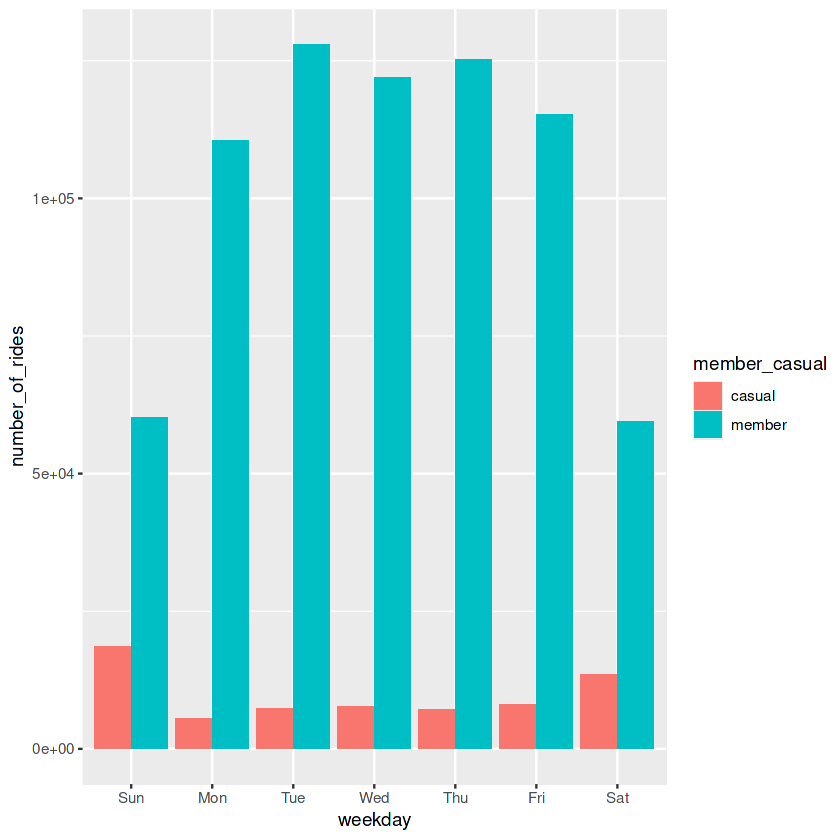

In [28]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

* Now I can create a visualization for average duration

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


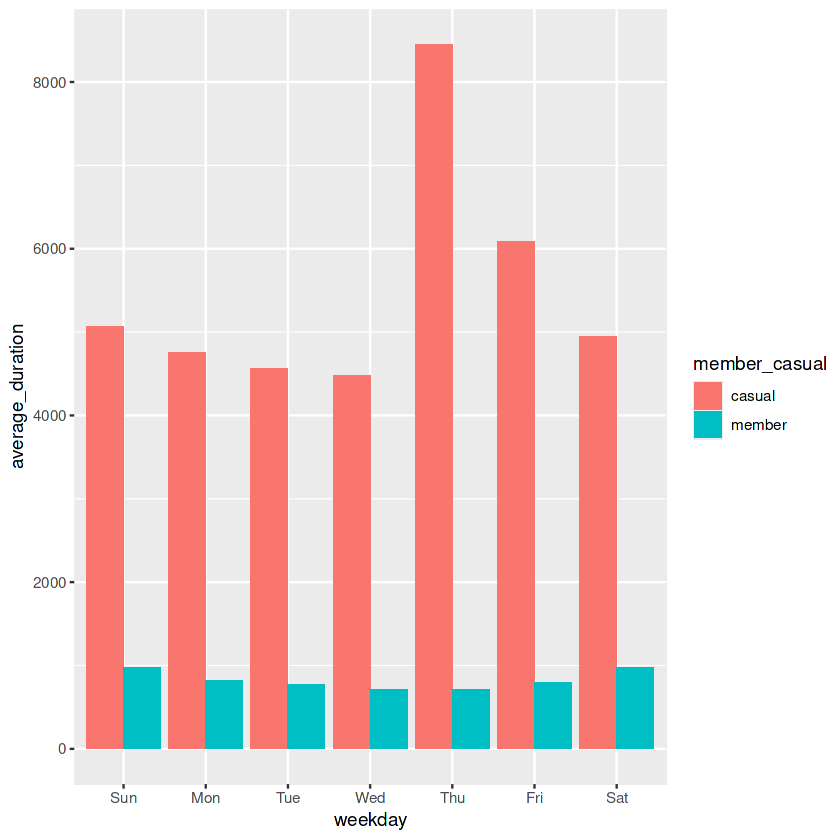

In [29]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

* I now create csv files that I will use to visualize in **Tableau**

In [30]:
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

write.csv(counts, file = 'avg_ride_length.csv')

In [31]:
number_of_rides <- all_trips_v2 %>%
mutate(weekday = wday(started_at, label = TRUE)) %>%
group_by(member_casual, weekday) %>%
summarise(number_of_rides = n()
,average_duration = mean(ride_length))

write.csv(number_of_rides, file = 'number_of_rides.csv')

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


In [32]:
write.csv(all_trips_v2, file = 'all_trips_v2.csv')

# <u>Share</u><br>

You can see my visualizations [*here*](https://public.tableau.com/views/CapstoneCaseStudyHowdoesabike-sharenavigatespeedysuccess/CaseStudyPrompt?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) in **Tableau** with further analysis.

# <u>Conclusion</u><br>

My final conclusion is that annual members and casual riders **do** use Cyclistic bikes differently. 

- While annual members use Cyclistic bikes more often, casual riders on average ride longer.

- Annual members use Cyclistic bikes more during the weekday, while casual riders use the bikes more on the weekends.


- The peak times of day suggests annual members use the bikes to and from work, while casual riders use the bikes as an afternoon activity.

- With the top 10 start & end stations for each user type, we can see which stations see the most traffic and narrow which stations each user type is most likely to use.


# <u>Recommendations</u><br>

My team and the business can apply my insights by creating multiple marketing plans that target the behavior of casual riders. 

- One offering can be a weekend membership that appeals to casual riders most likely to use the bikes on the weekends.

- Another can be a limited time discount during peak hours to attract more casual riders.

- Collaborate with local businesses in the area of the most visited stations.

- Give annual members referral codes to promote to friends and family to use Cyclistic.

# <u>Is there additional data that could be useful to expand on my findings?</u><br>

Yes, age is data that can be explored more to see what the age demographic is of Cyclistic users, potentially adding a student and/or a senior citizen offering as an option for future annual members. Diving deeper into the start & end stations can lead to interesting data about the socioeconomic demographic of Cyclistic users. Also, identifying types of bikes used can show insight what bikes riders like to use.